## **Project Description**

### Main Objective of the Analysis: Prediction or Interpretation?

Our customer churn analysis focuses on both prediction and interpretation to identify at-risk customers and understand why they churn.

#### Focus on Prediction
- **Early Detection**: Predict at-risk customers for timely retention strategies.
- **Targeted Interventions**: Tailor retention efforts to maximize impact.
- **Cost Efficiency**: Retain customers cost-effectively, saving on acquisition costs.
- **Optimal Resource Allocation**: Efficiently allocate resources to high-impact areas.

#### Focus on Interpretation
- **Understanding Customer Behavior**: Identify behavioral patterns and demographic factors linked to churn.
- **Identifying Churn Drivers**: Uncover root causes and dissatisfaction areas for improvement.
- **Improving Products and Services**: Use insights for continuous enhancement and customer-centric innovation.

### Benefits to the Business and Stakeholders
- **Enhanced Customer Retention**: Implement effective strategies to increase customer lifetime value.
- **Data-Driven Decision Making**: Inform product development, marketing, and customer service strategies.
- **Competitive Advantage**: Stay ahead of trends, address issues proactively, and improve offerings.
- **Stakeholder Confidence**: Build confidence through a comprehensive, proactive approach to churn analysis.


### Dataset Description
The dataset was based from Kaggle Competition. It already has a split data set: 'train' and 'test' csv files.

**train.csv** - the training set. 
Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes.

**test.csv** - the test set.
Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

### Data fields
* **state**, *string*. 2-letter code of the US state of customer residence
* **account_length**, *numerical*. Number of months the customer has been with the current telco provider
* **area_code**, *string*="area_code_AAA" where AAA = 3 digit area code.
* **international_plan**, *(yes/no)*. The customer has international plan.
* **voice_mail_plan**, *(yes/no)*. The customer has voice mail plan.
* **number_vmail_messages**, *numerical*. Number of voice-mail messages.
* **total_day_minutes**, *numerical*. Total minutes of day calls.
* **total_day_calls**, *numerical*. Total number of day calls.
* **total_day_charge**, *numerical*. Total charge of day calls.
* **total_eve_minutes**, *numerical*. Total minutes of evening calls.
* **total_eve_calls**, *numerical*. Total number of evening calls.
* **total_eve_charge**, *numerical*. Total charge of evening calls.
* **total_night_minutes**, *numerical*. Total minutes of night calls.
* **total_night_calls**, *numerical*. Total number of night calls.
* **total_night_charge**, *numerical*. Total charge of night calls.
* **total_intl_minutes**, *numerical*. Total minutes of international calls.
* **total_intl_calls**, *numerical*. Total number of international calls.
* **total_intl_charge**, *numerical*. Total charge of international calls
* **number_customer_service_calls**, *numerical*. Number of calls to customer service
* **churn**, *(yes/no)*. Customer churn - target variable.

source: [https://medium.com/@diego.hurtado.olivares/customer-churn-prediction-using-machine-learning-models-b088390ce0f0]
kaggle: [https://www.kaggle.com/code/diegohurtadoo/telco-churn-prediction-using-lstm-96-accuracy]

### Summary of Data Exploration
The data should be checked for missing values,outliers and inconsistencies.

### Import All required libraries.

In [1]:
import pandas as pd
import numpy as np

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

from xgboost import XGBClassifier
import shap

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Explore the Data
Basic Exploratory Data Analysis
1. Check the shape of the dataset
2. View the first few rows
3. Summary statistics
4. Check data types
5. Check for missing values
6. Visualize the distribution of numerical variables.
7. Visualize the distribution of categorical variables.
8. Correlation Analysis using correlation matrices.
9. Identify outliers.
10. Time for some feature engineering!!!

In [2]:
# import both datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# copy the df_train for exploration. 
df_combined = df_train.merge(df_test, how='outer')
df = df_train.copy()
df_t = df_test.copy()

print(f"df shape: {df.shape}")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # No limit on column width


df shape: (4250, 20)


In [3]:
# View the first few rows
df.head()



,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# Calculate summary statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


- **Account Length**: Average tenure is 100 months, ranging from 1 to 243 months.
- **Voicemail Messages**: Mostly zero, with an average of 7-8 messages.
- **Day Usage**: Around 180 minutes, with a maximum of 351.5 minutes.
- **Day Calls**: Average of 100 calls, ranging up to 165.
- **Day Charges**: Average charge is $30, ranging up to $59.76.
- **Evening Usage**: Similar pattern to day usage.
- **Night Usage**: Similar pattern to day and evening usage.
- **International Calls**: Relatively low usage and charges.
- **Customer Service Calls**: Mostly 1-2 calls, with some outliers.

In [5]:
# Check the Data types of each column in the dataset.
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

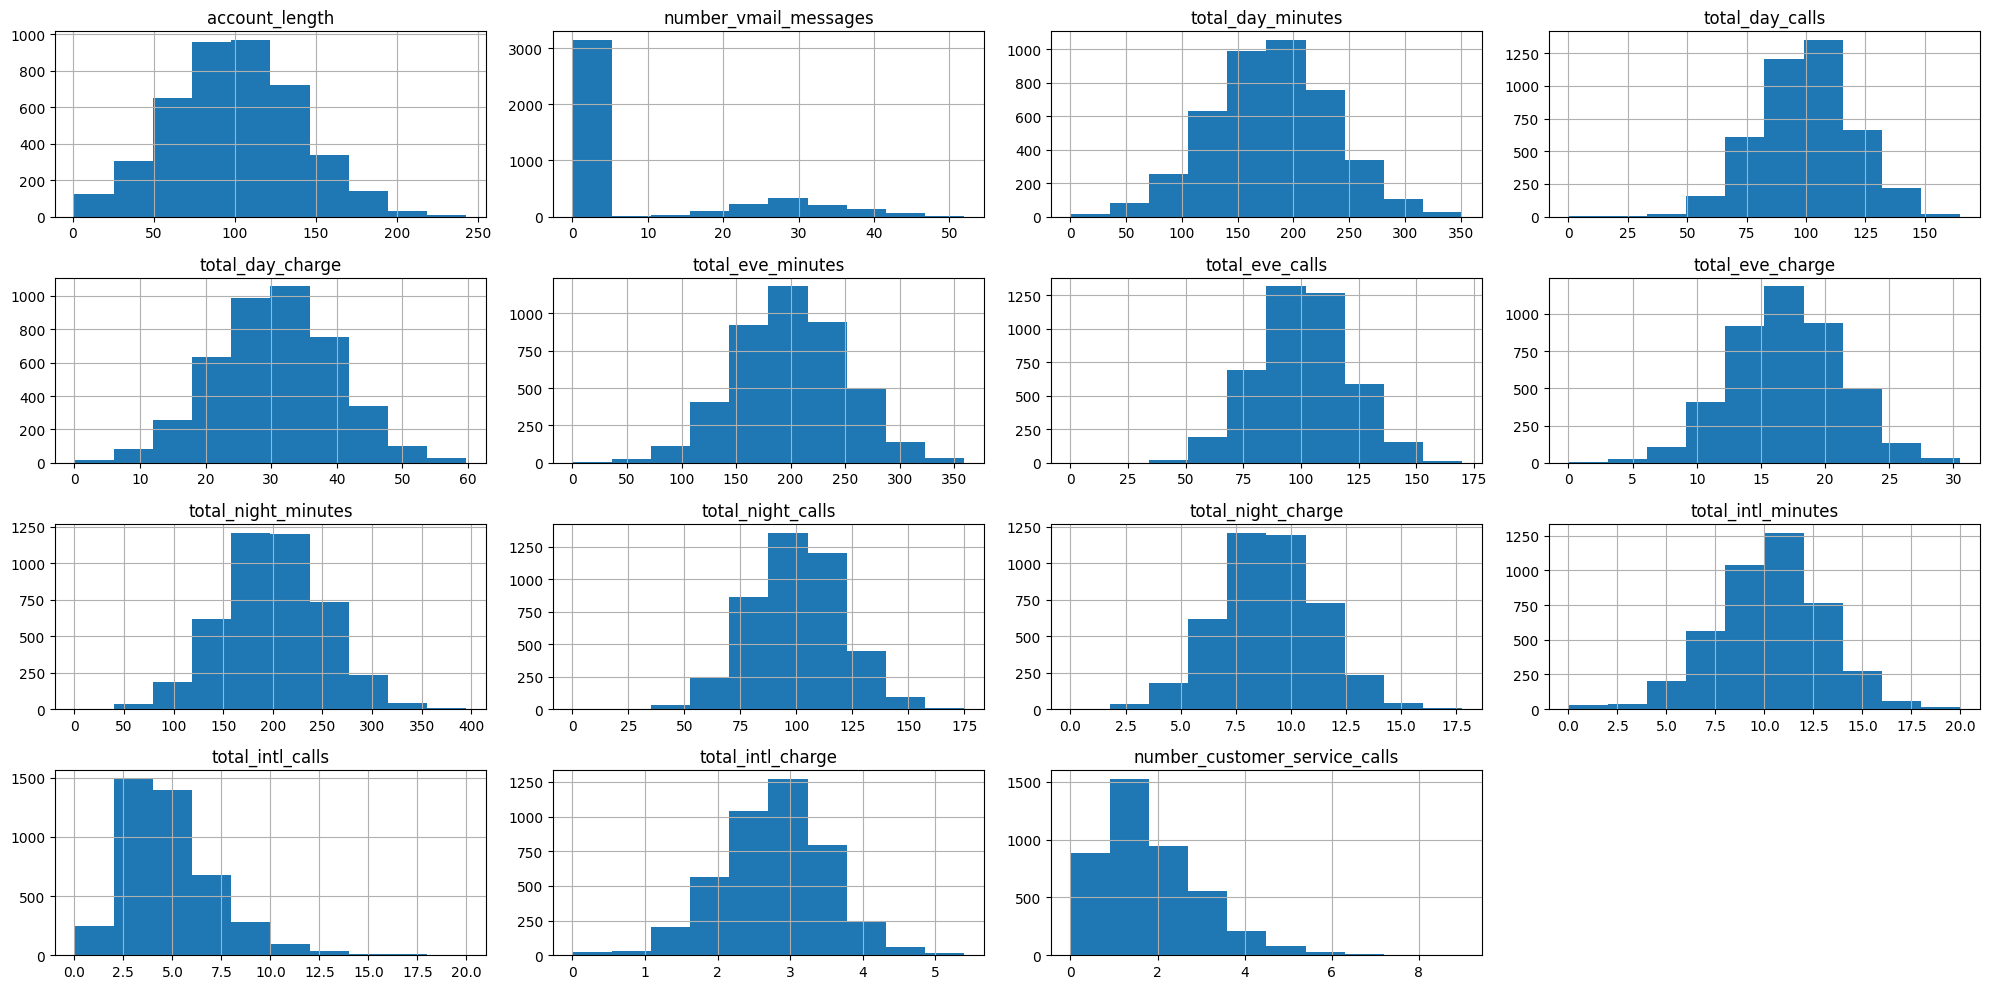

In [7]:
# Distribution of Numerical Variables
df.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

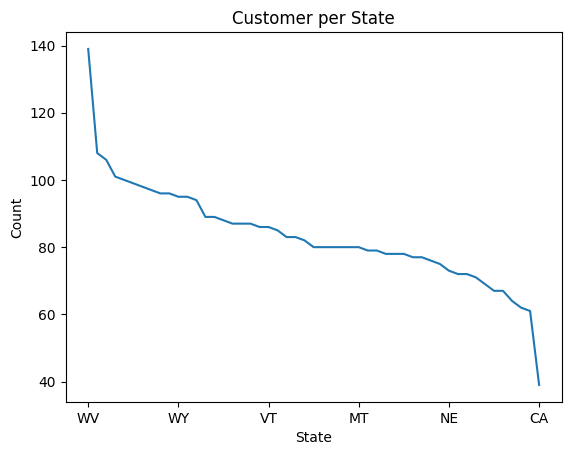

In [8]:
# Distribution of Categorical Variables:
df['state'].value_counts().plot(kind='line')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Customer per State')
plt.show()

In [9]:
# print Object Data Types
object_cols = df.select_dtypes(include=['object'])
uniq_vals = object_cols.apply(lambda x: x.unique())
# df['area_code'] = df['area_code'].apply(lambda x: x.replace("area_code_", ""))
object_cols


,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no
...,...,...,...,...,...
4245,MT,area_code_415,no,no,no
4246,WV,area_code_408,no,no,no
4247,NC,area_code_408,no,no,no
4248,HI,area_code_408,no,yes,no


In [10]:
# Print the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
uniq_vals = numeric_cols.apply(lambda x: len(x.unique()))
numeric_cols.describe().T


,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


### Pre-Processing

In [11]:
# Using MinMaxScaler to Numeric columns
# Prepare pre-defined functions for pre-processing and evaluation

def pre_process_data(df, scaler=None):
    df = encode_object_cols(df)
    if 'MinMaxScaler' == scaler:
        scaler = MinMaxScaler()      
    elif 'StandardScaler' == scaler:
        scaler = StandardScaler()
    numerical_columns = df.select_dtypes(include=['int64','float64']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

# Use LabelEncoder for all object data types
def encode_object_cols(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos


def get_correlation(X_test, y_test,models):
    #This function calculates the average correlation between predictors  
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test.to_numpy())
    
    corr=predictions.corr()
    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr

def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy": accuracy_score(y_test, model.predict(X_test)),"train Accuracy": accuracy_score(y_train, model.predict(X_train))}

# For Train Data: 'df', for testing data: 'df_t' (remove 'id' column in it, no 'churn' column)
X = df.drop(columns=['churn'], axis=1)
# X_t = df_t.drop(columns=['id'], axis=1)

transformed_df = pre_process_data(X, scaler='MinMaxScaler')
# transformed_df = pre_process_data(X_t, scaler='MinMaxScaler')

transformed_df.head()



,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,0.438017,1,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
1,31,0.561983,1,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
2,35,0.342975,0,1,0,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
3,36,0.305785,1,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
4,19,0.495868,2,0,1,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333


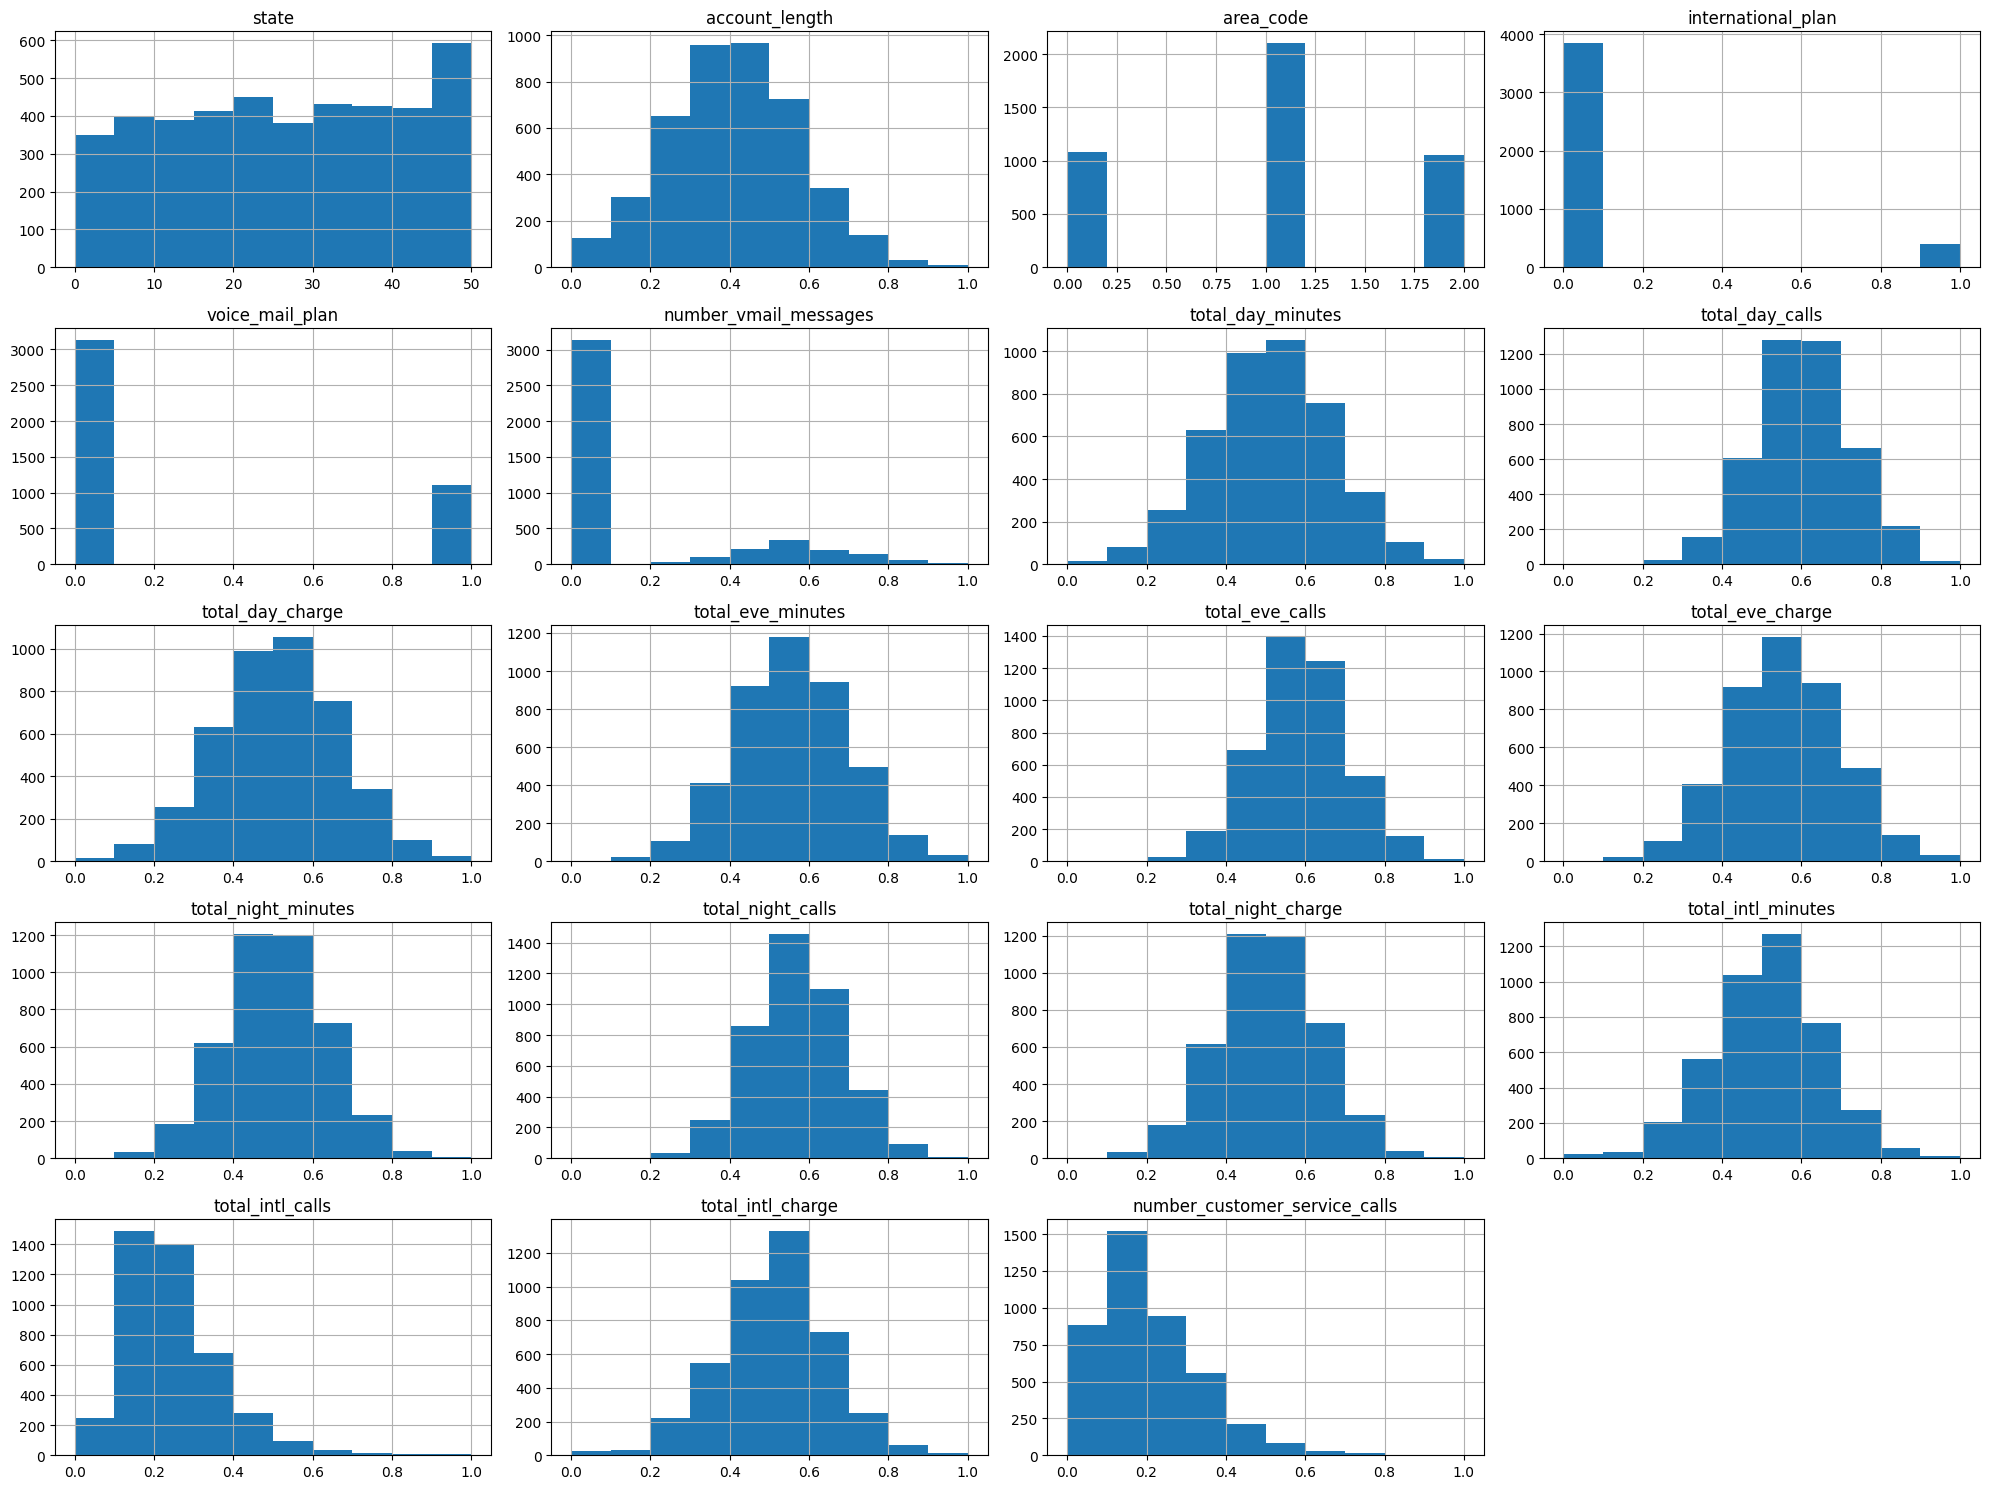

In [12]:

transformed_df.hist(figsize=(20,15))
plt.tight_layout()
plt.show() 

In [13]:
# Get the Value count for Churn and not churn
df['churn'].value_counts(normalize=True)

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64

<Axes: xlabel='churn'>

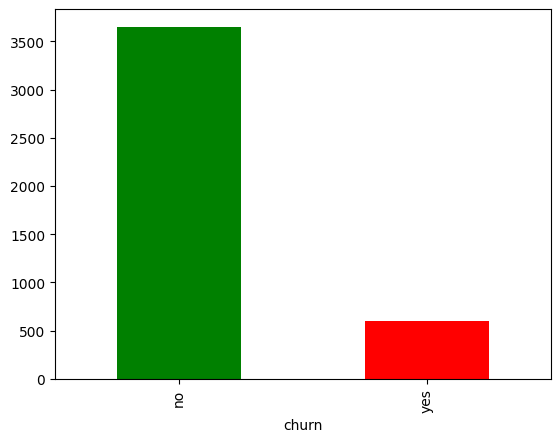

In [14]:


# Visualize Churn count
df['churn'].value_counts().plot.bar(color=['green', 'red'])

In [15]:
# Create a dataframe for variables to count the number of unique values
df_uniques = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns], columns=['Variable','Unique Values']).set_index('Variable')
print(df_uniques)


                               Unique Values
Variable                                    
state                                     51
account_length                           215
area_code                                  3
international_plan                         2
voice_mail_plan                            2
number_vmail_messages                     46
total_day_minutes                       1843
total_day_calls                          120
total_day_charge                        1843
total_eve_minutes                       1773
total_eve_calls                          123
total_eve_charge                        1572
total_night_minutes                     1757
total_night_calls                        128
total_night_charge                       992
total_intl_minutes                       168
total_intl_calls                          21
total_intl_charge                        168
number_customer_service_calls             10
churn                                      2


### Find the Correlation of the features
* Calculate the correlation matrix using pandas' corr method
* Visualize the correlation matrix

                                  state  account_length  area_code  \
state                          1.000000        0.008818   0.020713   
account_length                 0.008818        1.000000  -0.023530   
area_code                      0.020713       -0.023530   1.000000   
international_plan             0.003822        0.027050   0.027133   
voice_mail_plan               -0.034752        0.001663  -0.001622   
number_vmail_messages         -0.030857       -0.006626  -0.002468   
total_day_minutes              0.014263       -0.001612   0.006344   
total_day_calls               -0.009890        0.023002  -0.009064   
total_day_charge               0.014262       -0.001613   0.006342   
total_eve_minutes              0.001603       -0.010326  -0.000244   
total_eve_calls               -0.009116        0.005535  -0.014031   
total_eve_charge               0.001603       -0.010322  -0.000229   
total_night_minutes            0.004827       -0.009916   0.019034   
total_night_calls   

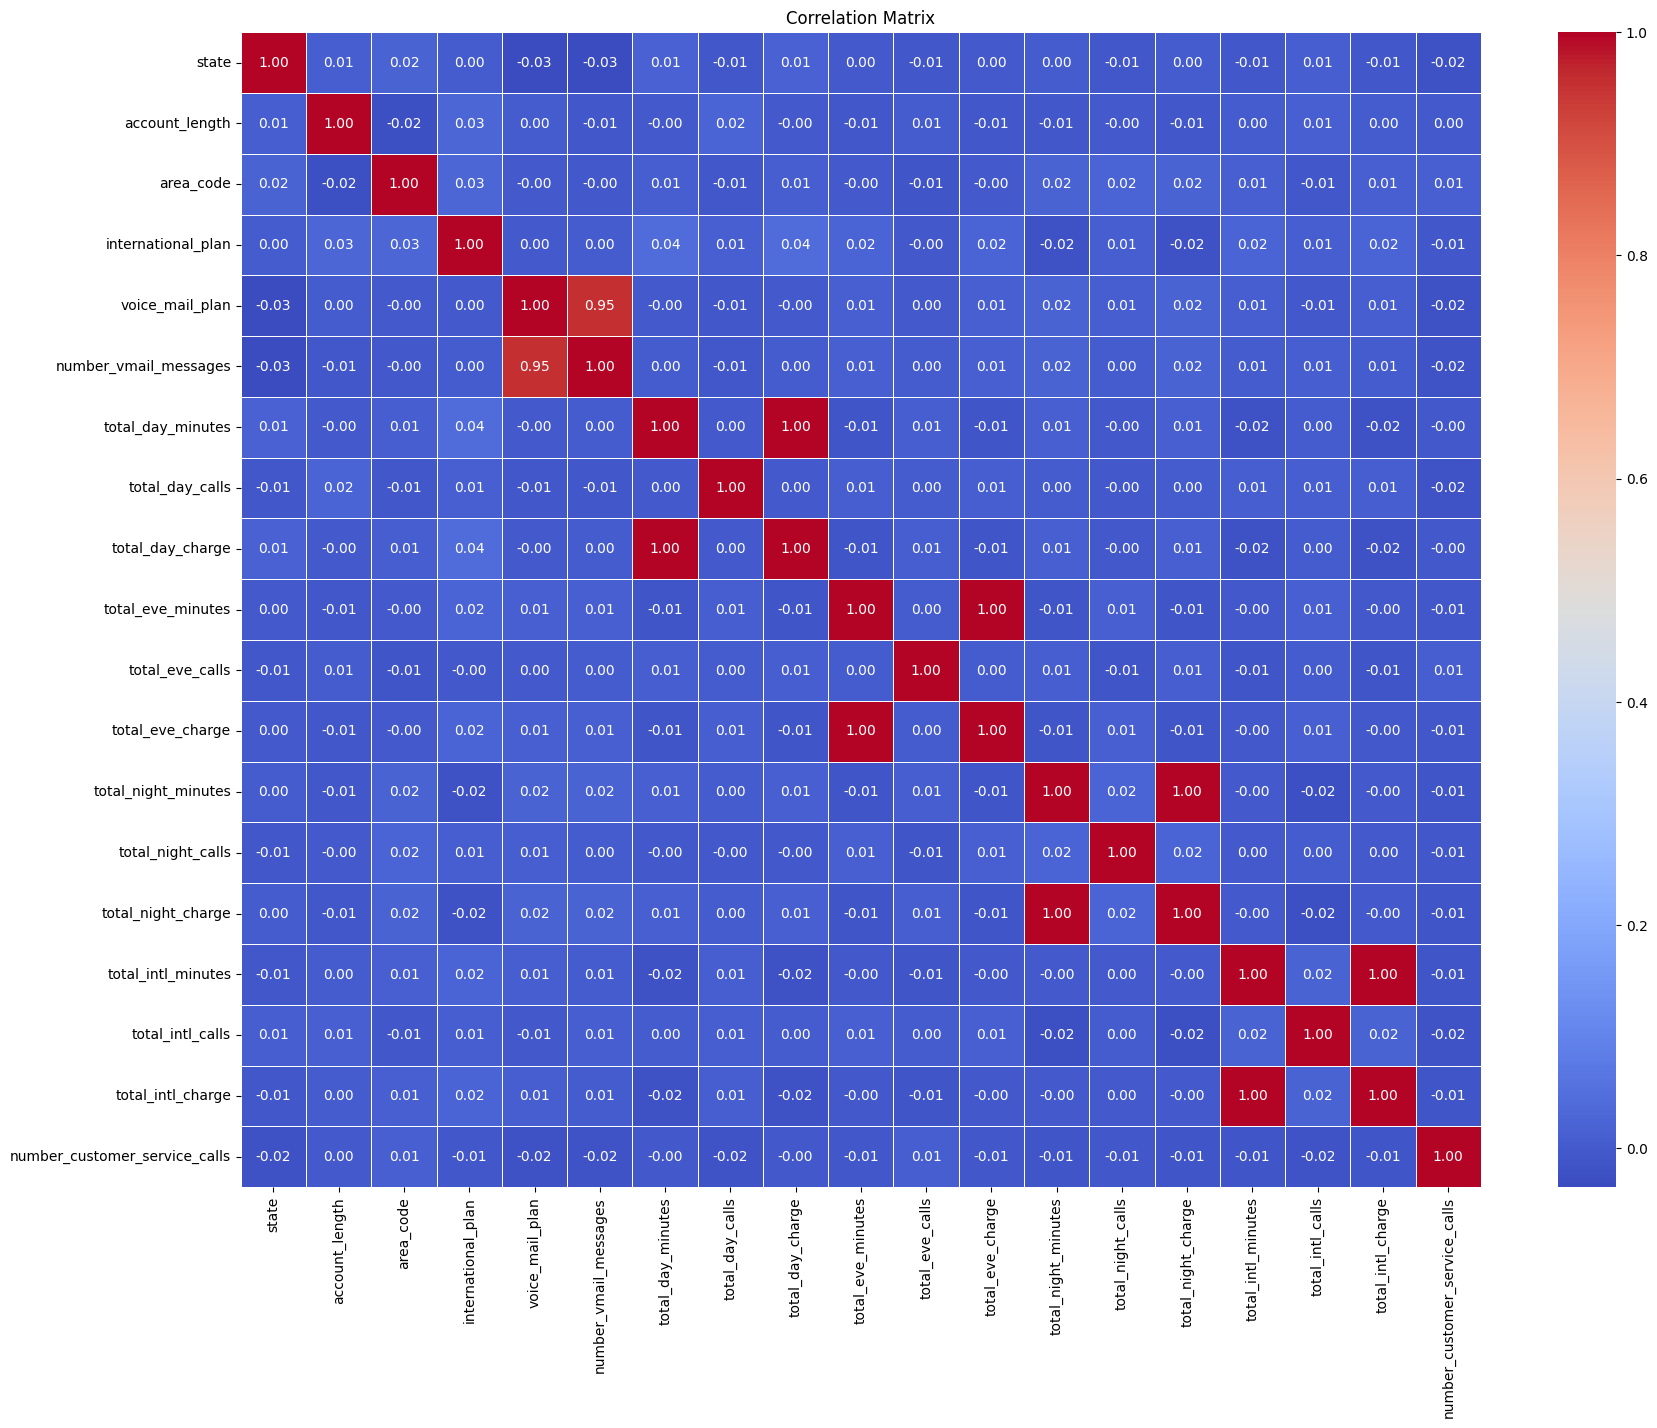

In [16]:
# Calculate the correlations between the dependent variables to identify those that are most correlated.
corr_matrix = transformed_df.corr()
print(corr_matrix)
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Selecting the best model classifier for a customer churn dataset.
1. Logistic Regression CV
2. Decision Trees
3. Random Forest
4. K-Nearest Neighbors

#### Use of Gridsearch to tune the hyperparameters of the model.
#### Evaluation of the model
With the use of accuracy, precision, recall,f1-score and ROC-AUC to determine which model performs best on the dataset.



In [17]:
X = transformed_df
y = pd.Series(LabelEncoder().fit_transform(df['churn']))


# Use StratifiedShuffleSplit to split the data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



### Logistic Regression, Random Forest Classifier, XGBoost


In [18]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

rows = []

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

classifiers = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'XGBoost': xgboost
}

for name, clf in classifiers.items():
    data = {}
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f_score = f1_score(y_test, y_pred, average='weighted')
    matrix = confusion_matrix(y_test, y_pred)

    data['Classifier Name'] = name
    data['Accuracy Score'] = f'{accuracy:.2f}'
    data['f1_score'] = round(f_score,2)
    rows.append(data)

print(rows)

e:\Python\2024_machine_learning_projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[{'Classifier Name': 'Logistic Regression', 'Accuracy Score': '0.86', 'f1_score': 0.82}, {'Classifier Name': 'Random Forest', 'Accuracy Score': '0.96', 'f1_score': 0.95}, {'Classifier Name': 'XGBoost', 'Accuracy Score': '0.96', 'f1_score': 0.96}]


In [19]:
df_scores = pd.DataFrame(rows)
df_scores.head()

,Classifier Name,Accuracy Score,f1_score
0,Logistic Regression,0.86,0.82
1,Random Forest,0.96,0.95
2,XGBoost,0.96,0.96


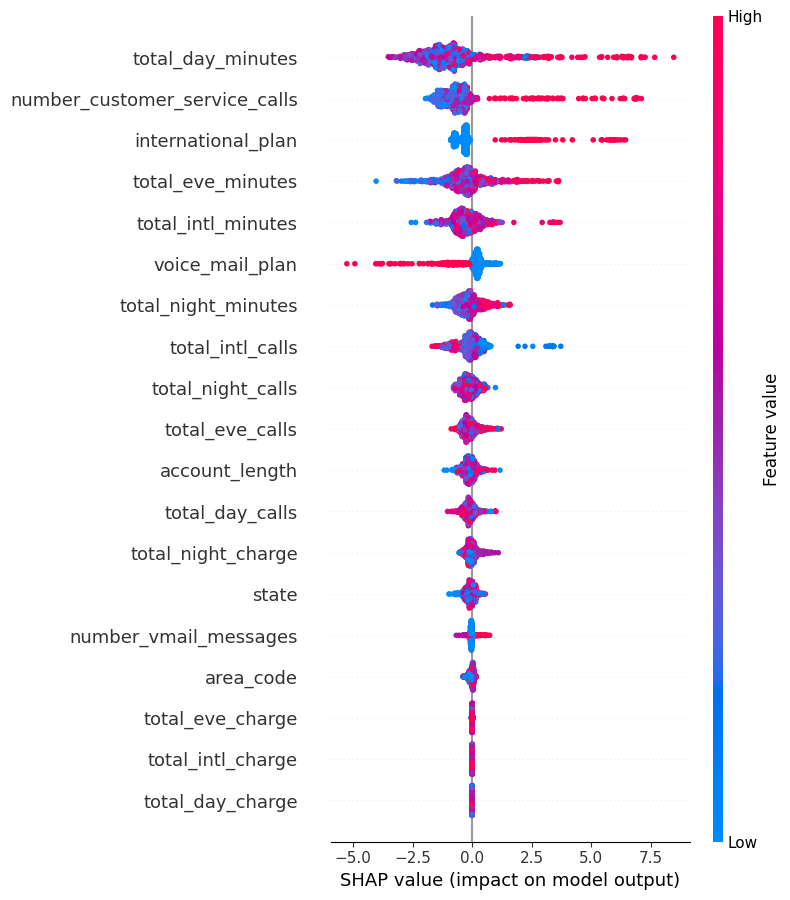

In [20]:
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, X_test)

### ROC Curve

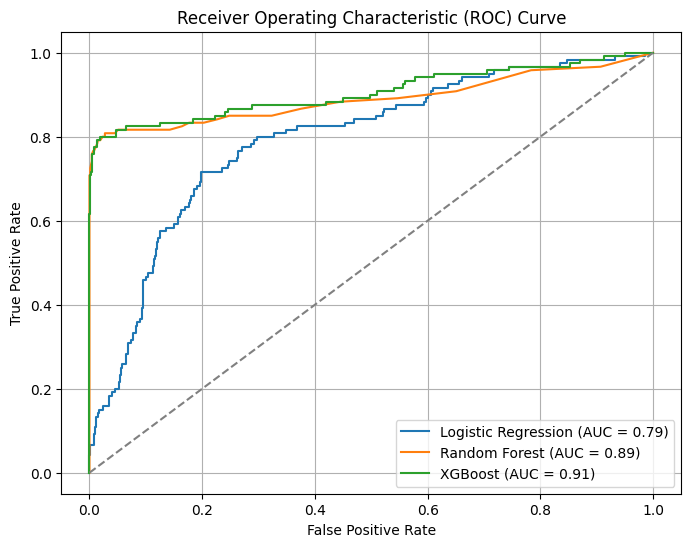

ROC AUC Scores:


In [21]:
roc_auc_scores = {}

plt.figure(figsize=(8,6))

for name, clf in classifiers.items():
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print ROC AUC scores
print("ROC AUC Scores:")
for name, score in roc_auc_scores.items():
    print(f"{name}: {score:.2f}")

## Logistic Regression Cross Validation
I used Logistic Regression with Cross Validation for automatic hyperparameter tuning.

In [22]:
from sklearn.linear_model import LogisticRegressionCV

log_cv = LogisticRegressionCV(cv=5, random_state=42)
log_cv.fit(X_train, y_train)
y_pred = log_cv.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


e:\Python\2024_machine_learning_projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Python\2024_machine_learning_projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[[716  14]
 [102  18]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       730
           1       0.56      0.15      0.24       120

    accuracy                           0.86       850
   macro avg       0.72      0.57      0.58       850
weighted avg       0.83      0.86      0.83       850



e:\Python\2024_machine_learning_projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

max_depth = 5
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
Tree.fit(X_train, y_train)

y_hat = Tree.predict(X_test)
# print(evaluate_metrics(y_test, y_hat))
get_accuracy(X_train, X_test, y_train, y_test, Tree)

{'test Accuracy': 0.9447058823529412, 'train Accuracy': 0.9608823529411765}

### Using GridSearchCV for exhaustive search over specified parameter values.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10) ] }

Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True)
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [25]:
search.best_score_

0.9497092463651255

In [26]:
search.best_params_

{'estimator__max_depth': 7, 'n_estimators': 39}

In [27]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.951764705882353, 'train Accuracy': 0.976764705882353}


In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(get_accuracy(X_train, X_test, y_train, y_test, rf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       758
           1       0.95      0.92      0.94       703

    accuracy                           0.94      1461
   macro avg       0.94      0.94      0.94      1461
weighted avg       0.94      0.94      0.94      1461

{'test Accuracy': 0.9397672826830937, 'train Accuracy': 1.0}


## K-Nearest Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(get_accuracy(X_train, X_test, y_train, y_test, knn))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       758
           1       0.79      0.93      0.85       703

    accuracy                           0.84      1461
   macro avg       0.85      0.85      0.84      1461
weighted avg       0.86      0.84      0.84      1461

{'test Accuracy': 0.8439425051334702, 'train Accuracy': 0.9205887386616464}


Text(0.5, 102.72222222222219, 'Ground Truth')

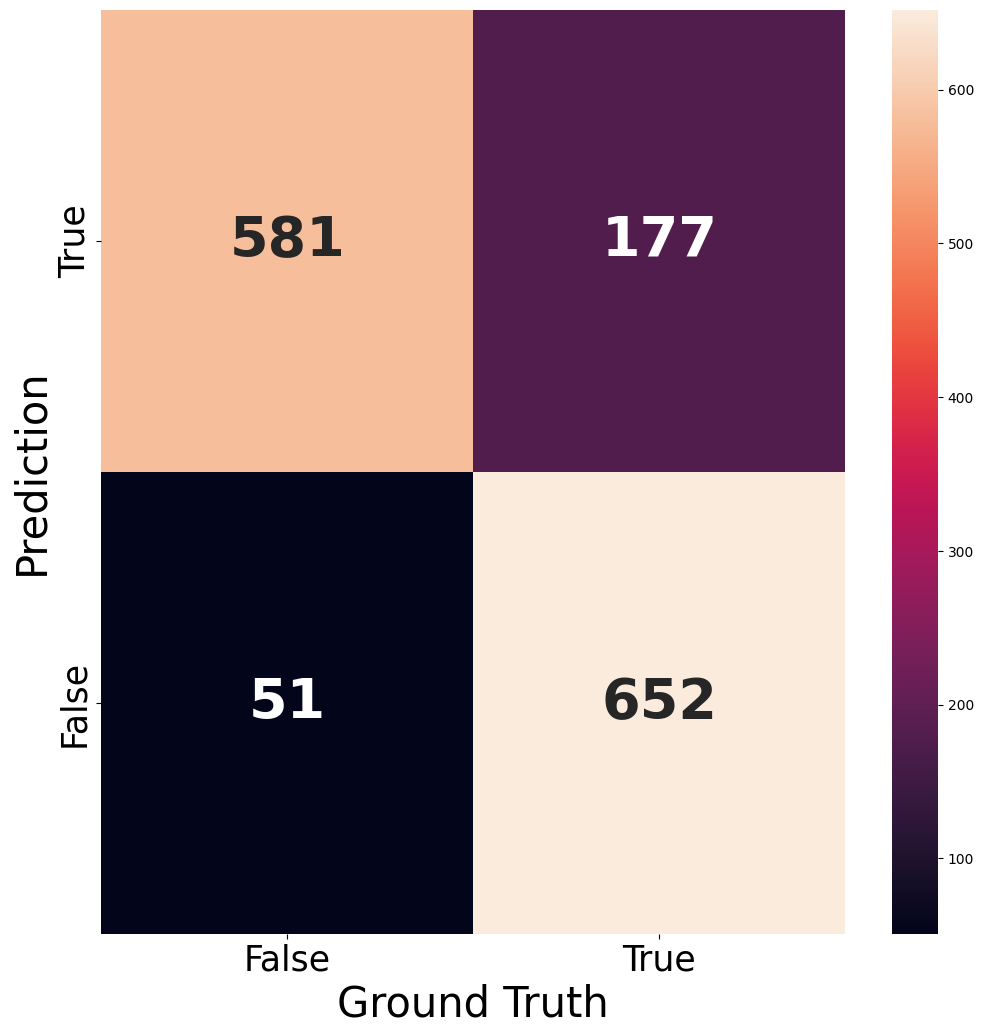

In [30]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print(get_accuracy(X_train, X_test, y_train, y_test, knn))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       758
           1       0.77      0.93      0.84       703

    accuracy                           0.83      1461
   macro avg       0.84      0.84      0.83      1461
weighted avg       0.85      0.83      0.83      1461

{'test Accuracy': 0.8316221765913757, 'train Accuracy': 1.0}


Text(0.5, 102.72222222222219, 'Ground Truth')

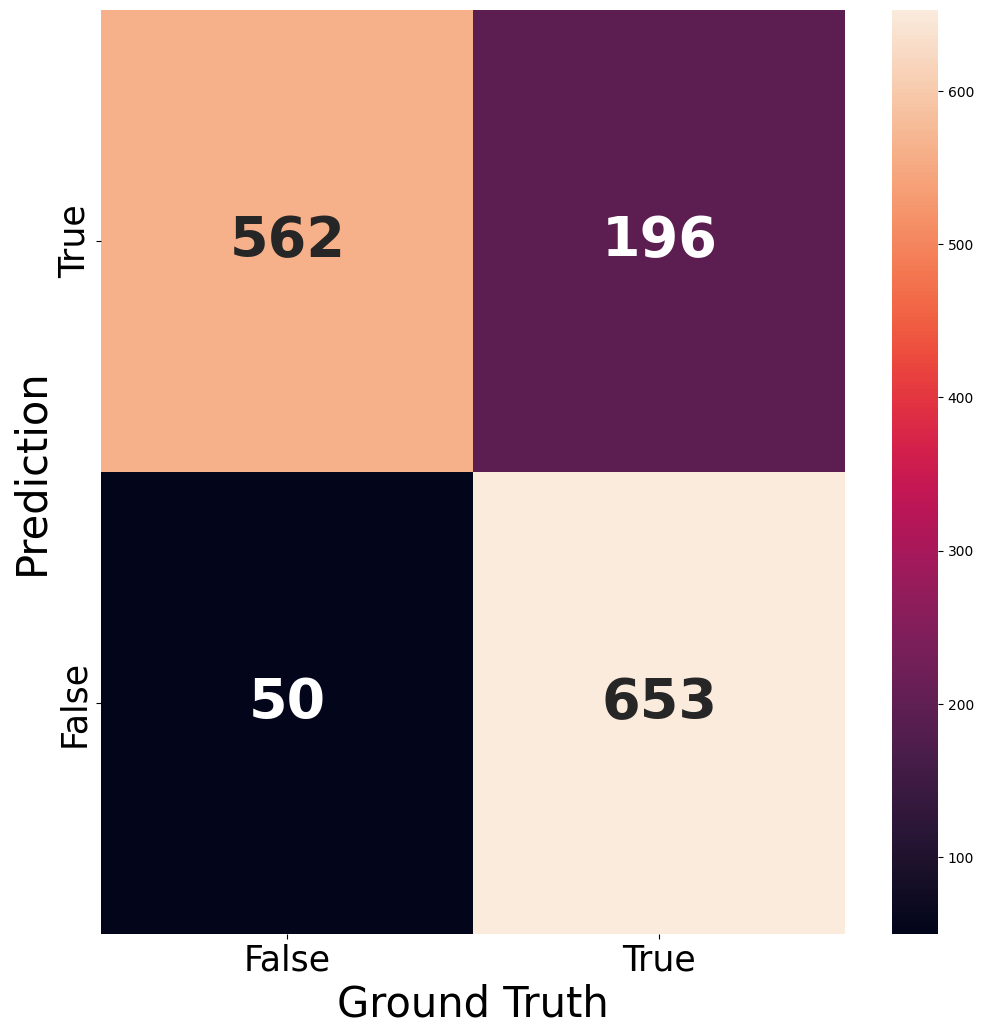

In [32]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [33]:
y_pred_encoded = LabelEncoder().fit_transform(y_pred)
y_test_encoded = LabelEncoder().fit_transform(y_test)
y_train_encoded = LabelEncoder().fit_transform(y_train)


In [34]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

## Plot F1 Results

<Figure size 1920x1440 with 0 Axes>

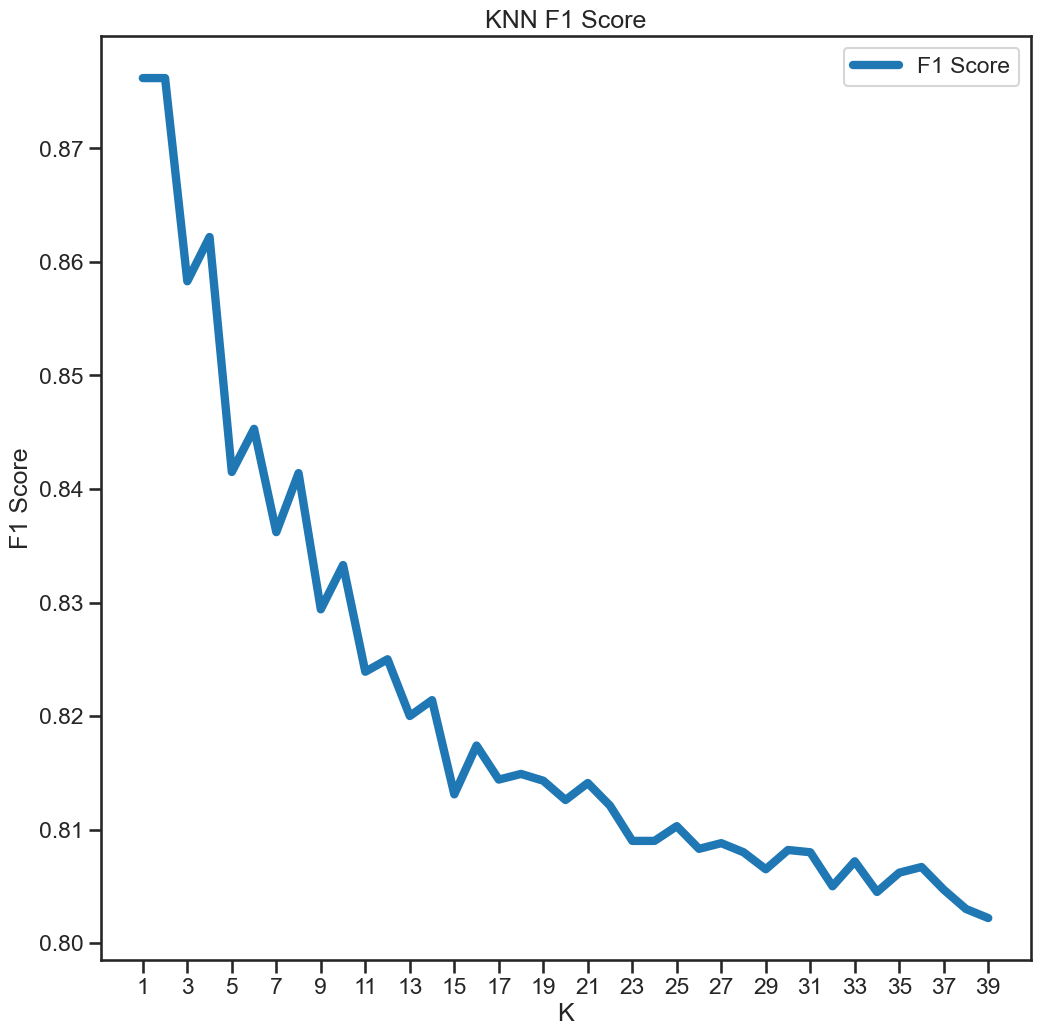

In [35]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

## Plot Accuracy (Error Rate) results

<Figure size 1920x1440 with 0 Axes>

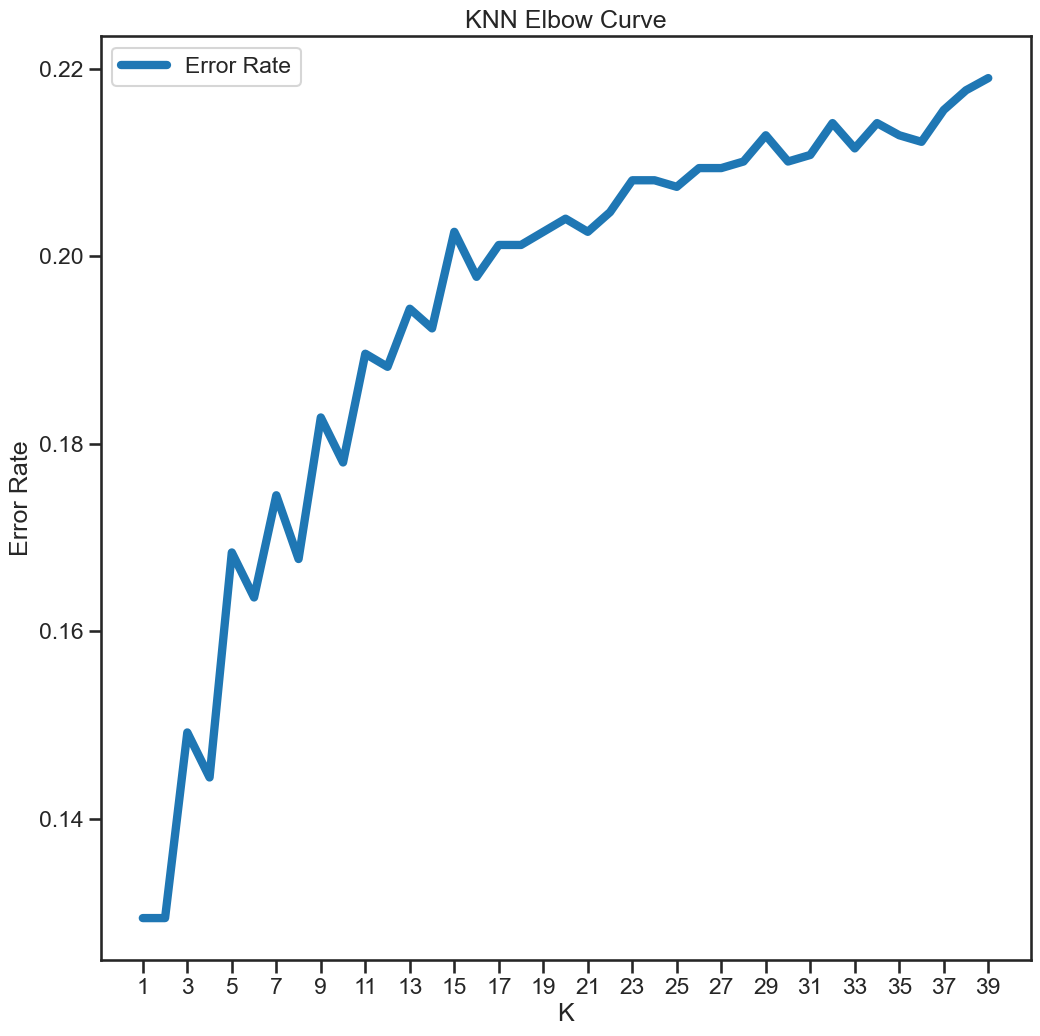

In [36]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')